Importing libraries


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the Dataset

In [108]:
df_train = pd.read_csv('./california_housing_train.csv')
df_test = pd.read_csv('./california_housing_test.csv')

In [109]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [110]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [111]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [112]:
# shape of input data
print(df_train.shape)

(17000, 9)


In [113]:
#total missing values per column
print(df_train.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [114]:
#check for duplicated rows
print(df_train.duplicated().sum())

0


In [115]:
X_train = np.array(df_train.iloc[:,:-1])
y_train = np.array(df_train.iloc[:,-1]).reshape(-1,1)

X_test = np.array(df_test.iloc[:,:-1])
y_test = np.array(df_test.iloc[:,-1]).reshape(-1,1)

In [116]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17000, 8)
(17000, 1)
(3000, 8)
(3000, 1)


In [117]:
y_train

array([[ 66900.],
       [ 80100.],
       [ 85700.],
       ...,
       [103600.],
       [ 85800.],
       [ 94600.]])

In [118]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # to avoid division by zero (if a feature has constant value)
    std[std == 0] = 1
    X_std = (X - mean) / std
    return X_std, mean, std

In [119]:
Std_X_train,mean_train,std_train = standardize(X_train)
Std_X_test,mean_test,std_test = standardize(X_test)

In [120]:
print(Std_X_train.shape)
print(Std_X_test.shape)

(17000, 8)
(3000, 8)


In [121]:
print(mean_train)
print(mean_test)

[-119.56210824   35.62522471   28.58935294 2643.66441176  539.41082353
 1429.57394118  501.22194118    3.8835781 ]
[-119.5892       35.63539      28.84533333 2599.57866667  529.95066667
 1402.79866667  489.912         3.8072718 ]


In [122]:
print(Std_X_test)

[[-1.23372874  0.81463305 -0.14699983 ...  0.13024561  0.31773437
   1.51074547]
 [ 0.64634391 -0.64593087  1.12756514 ... -0.57629585 -0.58274291
  -0.11232419]
 [ 0.89200673 -0.87135553 -0.14699983 ...  0.07880784  0.01392592
   1.0711495 ]
 ...
 [-0.05554988  0.31212392 -1.5012251  ... -0.68887663 -0.73875265
  -0.81855768]
 [ 1.2379401  -0.72107242  0.88858421 ... -1.31680565 -1.30257733
  -0.2893275 ]
 [-0.02045519 -0.57078932  1.04790483 ... -0.63064519 -0.62927213
   2.56365089]]


In [123]:
print(Std_X_train)

[[ 2.619365   -0.67152023 -1.07967114 ... -0.36118401 -0.07599796
  -1.25254316]
 [ 2.53956878 -0.57326437 -0.76187201 ... -0.26186523 -0.09940441
  -1.08148298]
 [ 2.4946834  -0.90546278 -0.92077158 ... -0.95535424 -0.99925206
  -1.17010515]
 ...
 [-2.36291168  2.90780067 -0.92077158 ... -0.16167524 -0.11760942
  -0.44666313]
 [-2.36291168  2.88908527 -0.76187201 ... -0.1146295  -0.06039367
  -0.99778717]
 [-2.387848    2.29955006  1.85997083 ... -0.54326844 -0.60134255
  -0.45536288]]


In [124]:
class NormalEquation:
    def fit(self, X, y):
        # Add bias column (intercept term)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # Normal equation: θ = (XᵀX)⁻¹Xᵀy
        self.theta = np.linalg.inv(X_b.T @ X_b) @ (X_b.T @ y)

    def predict(self, X):
        # Add bias column
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ self.theta

In [125]:
ne = NormalEquation()

In [126]:
ne.fit(Std_X_train,y_train)

In [127]:
print("Learned Parameters: ",ne.theta)

Learned Parameters:  [[207300.91235294]
 [-86499.60728226]
 [-91744.05083061]
 [ 14483.29860201]
 [-18263.60700749]
 [ 49587.33777166]
 [-44178.15153005]
 [ 17470.57604338]
 [ 77291.55314914]]


In [128]:
y_pred = ne.predict(Std_X_test)

In [129]:
print("Predicted Values: ",y_pred)

Predicted Values:  [[358460.00878369]
 [216569.51471133]
 [276384.95549539]
 ...
 [ 90664.64488211]
 [151950.61857716]
 [466849.37460678]]


In [130]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)   # residual sum of squares
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # total sum of squares
    return 1 - (ss_res / ss_tot)

In [131]:
print(r2_score(y_test, y_pred))

0.6180349003715608


In [132]:
class GradientDescent:
    def __init__(self):
        pass

    def fit(self, x_train, y_train, epochs=10000, learning_rate=0.01):
        rows, cols = x_train.shape

        # Add bias term
        modified_x_train = np.c_[np.ones((rows, 1)), x_train]
        theta = np.zeros((cols + 1, 1))
        transpose_x = modified_x_train.T

        # Store training history
        loss_per_iterations = []
        weights = []
        val_loss = []

        for i in range(epochs):
            # Forward pass
            y_pred = modified_x_train @ theta

            # Gradient descent update
            gradient = (transpose_x @ (y_pred - y_train)) / rows
            theta -= learning_rate * gradient

            # Training loss
            train_loss = np.mean((y_pred - y_train) ** 2)
            loss_per_iterations.append(train_loss)

            # Store weights (excluding bias term for clarity)
            weights.append(theta[1:].flatten().copy())

            # Validation loss same as training loss (on training data itself)
            val_loss.append(train_loss)

        # Save attributes
        self.theta = theta
        self.loss_per_iterations = loss_per_iterations
        self.weights = weights
        self.val_loss = val_loss  # validation loss is training loss on same data

    def predict(self, x_test):
        modified_x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]
        return modified_x_test @ self.theta

In [133]:
gd = GradientDescent()

In [134]:
gd.fit(Std_X_train,y_train,epochs=1000,learning_rate=0.01)

In [135]:
y_pred = gd.predict(Std_X_test)

In [136]:
print(y_pred)

[[344737.26708361]
 [221052.68780685]
 [286959.15684752]
 ...
 [ 90895.26259309]
 [175317.53018716]
 [454215.5264196 ]]


In [137]:
accuracy = r2_score(y_test, y_pred)
print("R² Accuracy:", accuracy)

R² Accuracy: 0.5974432079081875


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [139]:
model = LinearRegression()

In [140]:
model.fit(Std_X_train,y_train)

LinearRegression()

In [141]:
y_pred = model.predict(Std_X_test)

In [142]:
from sklearn.metrics import mean_squared_error

In [143]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 4886020526.855479
R² Score: 0.6180349003715606


VISUALIZATIONS

In [144]:
curves = []
epochs = 1000

def run_experiment(x_train, y_train, learning_rates, label_prefix):
    for lr in learning_rates:
        gd = GradientDescent()
        gd.fit(x_train=x_train, y_train=y_train, epochs=epochs, learning_rate=lr)
        curves.append((f"{label_prefix}, lr={lr}", gd.loss_per_iterations))

# Five learning rates for unscaled data
unscaled_lrs = [1e-8, 1e-9, 1e-10]
run_experiment(X_train, y_train, unscaled_lrs, "unscaled")

# Five learning rates for scaled data
scaled_lrs = [0.0001, 0.00001, 0.0003, 0.001, 0.000003]
run_experiment(Std_X_train, y_train, scaled_lrs, "scaled")

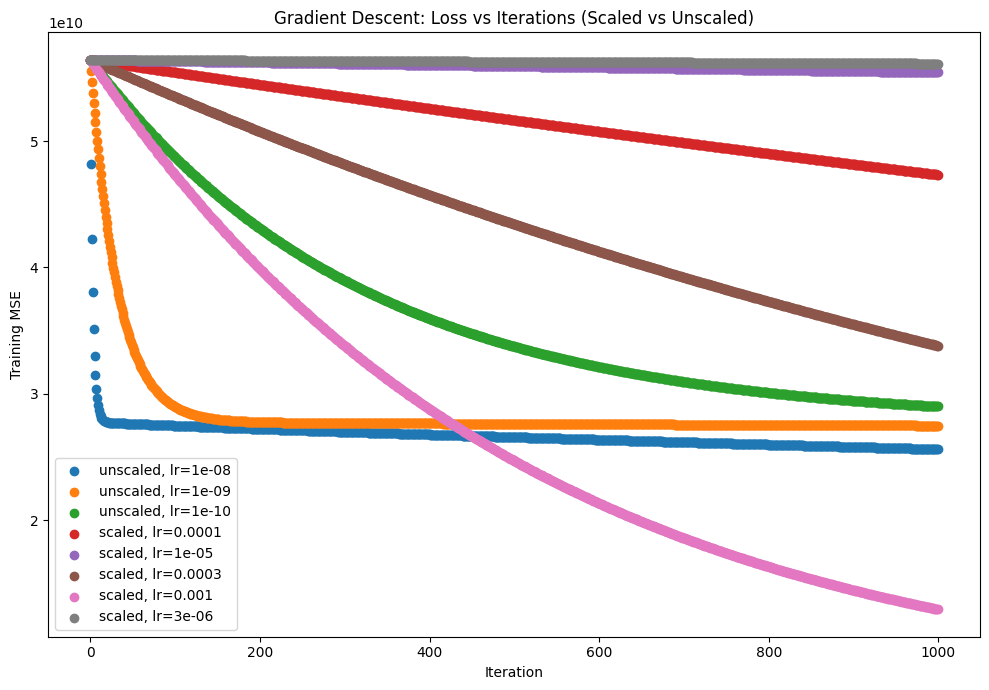

In [145]:
plt.figure(figsize=(10,7))
for label, loss in curves:
    plt.scatter(range(len(loss)), loss, label=label)

plt.xlabel("Iteration")
plt.ylabel("Training MSE")
plt.title("Gradient Descent: Loss vs Iterations (Scaled vs Unscaled)")
plt.yscale("linear")
plt.legend()
plt.tight_layout()
plt.show()


In [146]:
gd = GradientDescent()

In [147]:
gd.fit(Std_X_train,y_train,epochs=500,learning_rate=0.01)

In [148]:
print(len(gd.weights))

500


In [149]:
print(len(gd.loss_per_iterations))

500


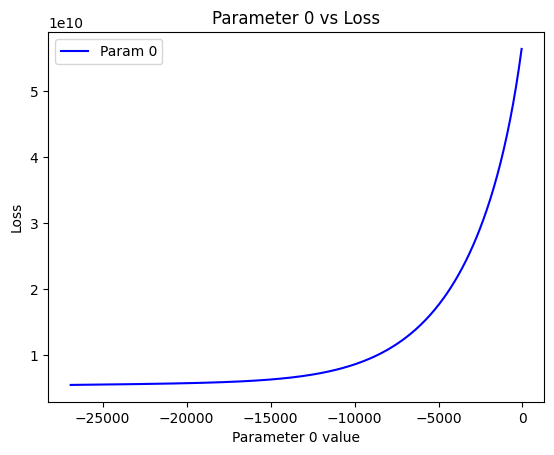

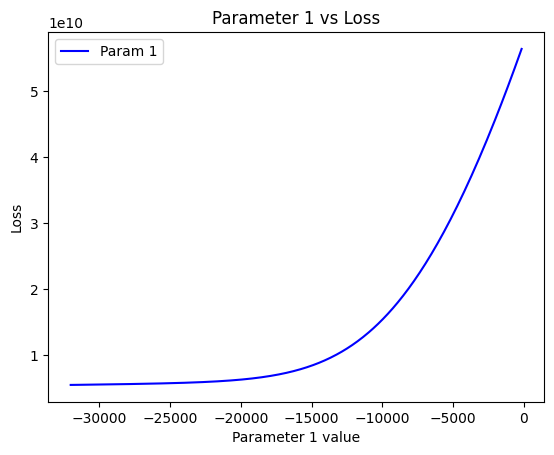

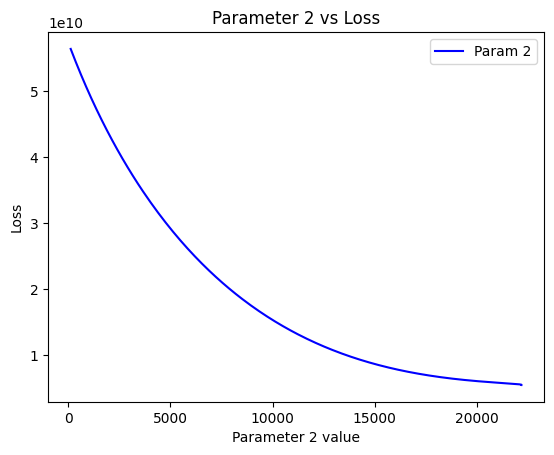

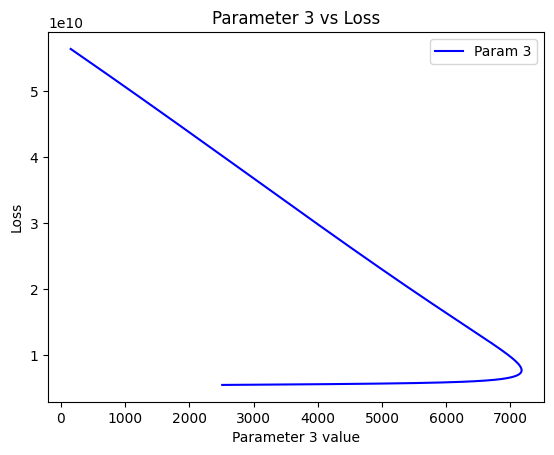

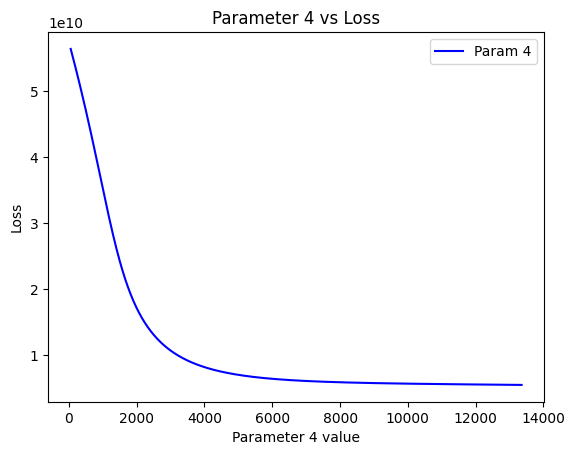

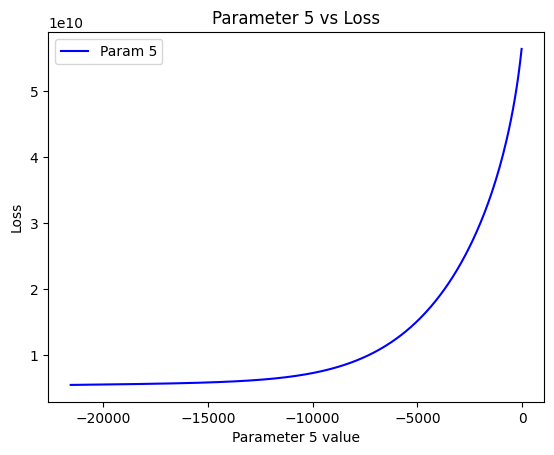

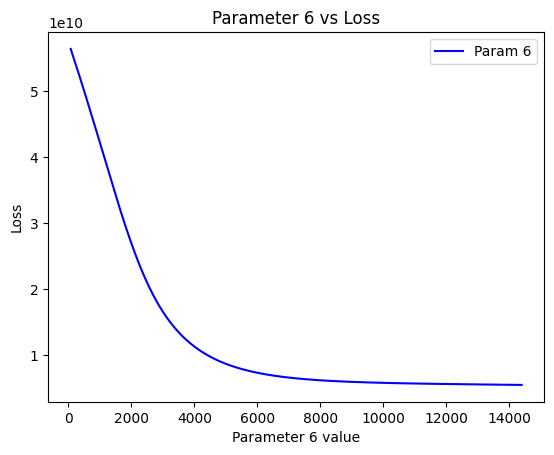

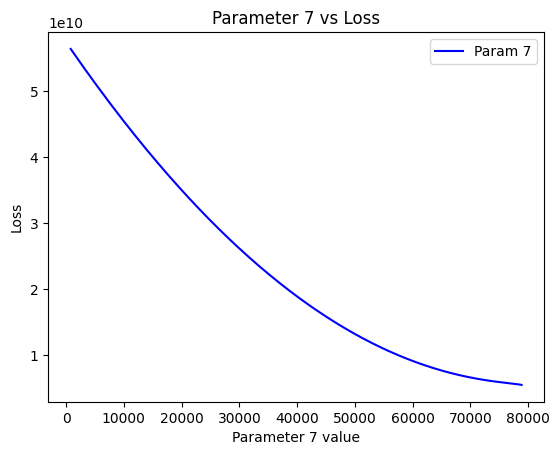

In [150]:
import matplotlib.pyplot as plt

num_params = len(gd.weights[0])  # Number of parameters per epoch
color = 'blue'  # Choose a single color

for param_index in range(num_params):
    param_values = [w[param_index] for w in gd.weights]

    plt.figure()
    plt.plot(param_values, gd.loss_per_iterations, color=color, label=f"Param {param_index}")
    plt.title(f"Parameter {param_index} vs Loss")
    plt.xlabel(f"Parameter {param_index} value")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [151]:
final_weights = gd.weights[-1]
print("Final weights:", final_weights)

Final weights: [-26898.90441264 -32021.07963534  22176.0412965    2511.34383896
  13355.33251947 -21538.44338933  14393.40381513  78865.95787103]


VALIDATION LOSS

In [152]:
print(gd.val_loss)

[np.float64(56425110555.93047), np.float64(55426265655.43417), np.float64(54447449046.47511), np.float64(53488245678.616516), np.float64(52548249995.829506), np.float64(51627065655.054886), np.float64(50724305257.37465), np.float64(49839590091.00712), np.float64(48972549885.39725), np.float64(48122822575.72499), np.float64(47290054077.20363), np.float64(46473898068.5843), np.float64(45674015784.324394), np.float64(44890075814.915886), np.float64(44121753914.90478), np.float64(43368732818.1658), np.float64(42630702060.02674), np.float64(41907357805.86475), np.float64(41198402685.82302), np.float64(40503545635.32011), np.float64(39822501741.0467), np.float64(39154992092.164734), np.float64(38500743636.44348), np.float64(37859489041.08427), np.float64(37230966558.0022), np.float64(36614919893.34856), np.float64(36011098081.07113), np.float64(35419255360.32319), np.float64(34839151056.54379), np.float64(34270549466.04323), np.float64(33713219743.937786), np.float64(33166935795.28797), np.f

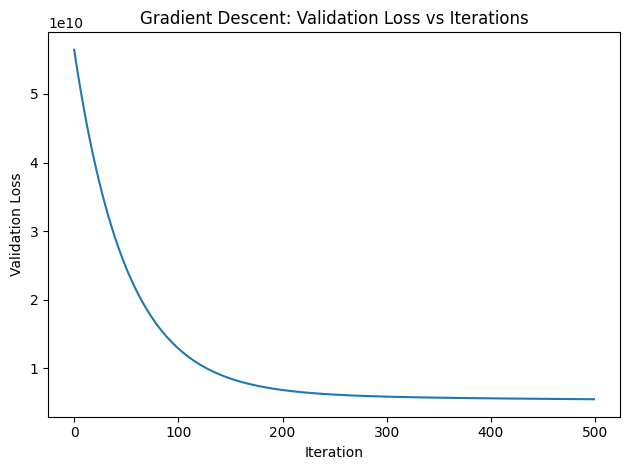

In [153]:
plt.plot(range(len(gd.val_loss)), gd.val_loss)
plt.xlabel("Iteration")
plt.ylabel("Validation Loss")
plt.title("Gradient Descent: Validation Loss vs Iterations")
plt.yscale("linear")
plt.tight_layout()
plt.show()

In [154]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [155]:
def print_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Coefficient of Determination (R2): {r2:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print()

In [156]:
model = LinearRegression()
model.fit(Std_X_train,y_train)

LinearRegression()

In [157]:
y_pred_normal = ne.predict(Std_X_test)
y_pred_gd = gd.predict(Std_X_test)
y_pred_sklearn = model.predict(Std_X_test)

In [158]:
print_metrics(y_test, y_pred_normal, "Normal Equation")
print_metrics(y_test, y_pred_gd, "Gradient Descent")
print_metrics(y_test, y_pred_sklearn, "Scikit-Learn Model")

Metrics for Normal Equation:
  Mean Squared Error (MSE): 4886020526.8555
  Root Mean Squared Error (RMSE): 69900.0753
  Coefficient of Determination (R2): 0.6180
  Mean Absolute Error (MAE): 50669.4461

Metrics for Gradient Descent:
  Mean Squared Error (MSE): 5484640554.1968
  Root Mean Squared Error (RMSE): 74058.3591
  Coefficient of Determination (R2): 0.5712
  Mean Absolute Error (MAE): 54129.1479

Metrics for Scikit-Learn Model:
  Mean Squared Error (MSE): 4886020526.8555
  Root Mean Squared Error (RMSE): 69900.0753
  Coefficient of Determination (R2): 0.6180
  Mean Absolute Error (MAE): 50669.4461

